<a href="https://colab.research.google.com/github/Abdul-ur-Rehman-Butt/2022-SE-27_LAB_TASKS_ML/blob/main/OEL_ML_2022_SE_27___01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Load the MNIST dataset
train_df = pd.read_csv('/content/mnist_train.csv')
test_df = pd.read_csv('/content/mnist_test.csv')

In [ ]:
# Print first few rows
print("First few rows of training dataset:\n", train_df.head())
print("Shape of training dataset:", train_df.shape)
print("Shape of testing dataset:", test_df.shape)

First few rows of training dataset:
    0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]
Shape of training dataset: (60000, 785)
Shape of testing dataset: (10000, 785)


In [ ]:
# Print column names to verify order
print("Column names:", train_df.columns)

Column names: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', 'label'],
      dtype='object', length=785)


In [ ]:
# Extract features and labels correctly
X_train = train_df.iloc[:, :-1].values  # All columns except the last one (features)
y_train = train_df.iloc[:, -1].values   # The last column (label)

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values


In [ ]:
# Apply Normalization (MinMax Scaling)
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

# Apply Standardization (Z-score Scaling)
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
# Check if unique labels are correct
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


**Train the models using train_mnsit.csv and test model using test_mnsit.cs**v

In [ ]:
# Train KNN with k=3
print("\nTraining K-Nearest Neighbors (KNN)...")
knn = KNeighborsClassifier(n_neighbors=3)  # k=3 (you can tune this)
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate model performance
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))


Training K-Nearest Neighbors (KNN)...

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.95      0.99      0.97      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.93      0.93      0.93       892
           6       0.97      0.97      0.97       958
           7       0.94      0.93      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.95      0.95     10000


KNN Accuracy: 0.9452


In [ ]:
# Train Logistic Regression model
print("\nTraining Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_lr = log_reg.predict(X_test)

# Evaluate model performance
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Training Logistic Regression...

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.87       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


Logistic Regression Accuracy: 0.9215


In [ ]:
# Train Artificial Neural Network (ANN)
print("\nTraining Artificial Neural Network (ANN)...")
ann = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=50, random_state=42)
ann.fit(X_train, y_train)

# Predict on test data
y_pred_ann = ann.predict(X_test)

# Evaluate model performance
print("\nANN Classification Report:\n", classification_report(y_test, y_pred_ann))
print("\nANN Accuracy:", accuracy_score(y_test, y_pred_ann))


Training Artificial Neural Network (ANN)...

ANN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


ANN Accuracy: 0.9782


In [ ]:
# Store accuracy scores
model_performance = {
    "Model": ["KNN", "Logistic Regression", "Artificial Neural Network (ANN)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_ann)
    ]
}

# Convert to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Print table
print("\nModel Performance Comparison:")
print(performance_df)


Model Performance Comparison:
                             Model  Accuracy
0                              KNN    0.9452
1              Logistic Regression    0.9215
2  Artificial Neural Network (ANN)    0.9782


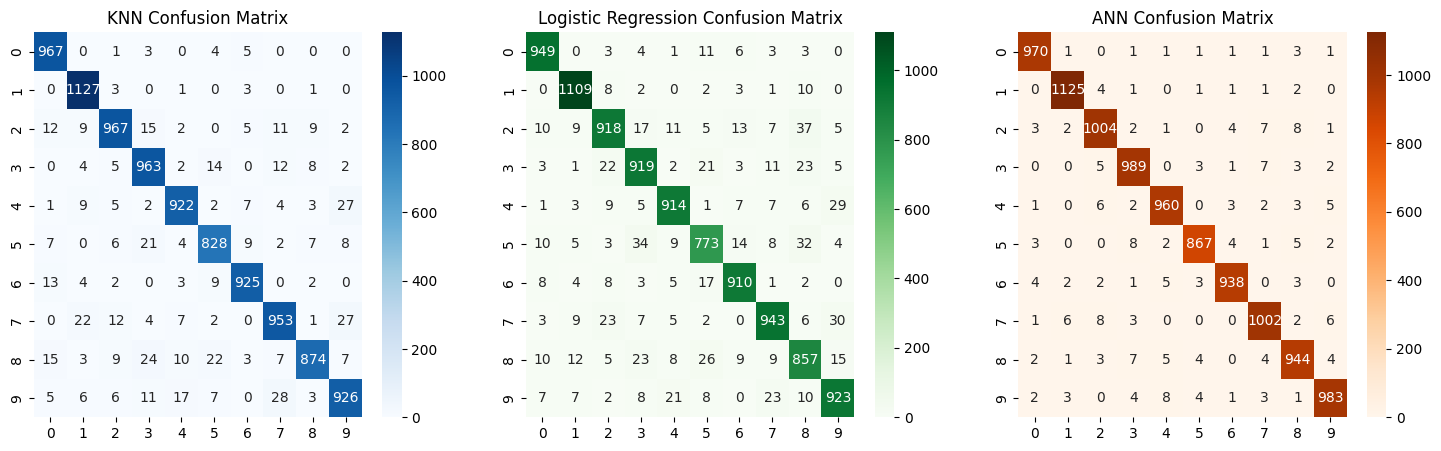

In [ ]:
# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("KNN Confusion Matrix")

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")

# ANN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt="d", cmap="Oranges", ax=axes[2])
axes[2].set_title("ANN Confusion Matrix")

plt.show()

**Hyperparameter tuning the models**

In [ ]:
# KNN MODEL

# Define parameter grid
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# Perform Grid Search
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3)
knn_grid.fit(X_train, y_train)

# Best parameters
print("Best KNN Parameters:", knn_grid.best_params_)

# Predict using best model
y_pred_knn_best = knn_grid.best_estimator_.predict(X_test)

# Evaluate optimized KNN
print("Optimized KNN Accuracy:", accuracy_score(y_test, y_pred_knn_best))


Best KNN Parameters: {'n_neighbors': 5}
Optimized KNN Accuracy: 0.9443


In [ ]:
#  Logistic Regression

# Define parameter grid
param_grid_log = {'C': [0.01, 0.1, 1]}

# Perform Grid Search
log_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=3)
log_grid.fit(X_train, y_train)

# Best parameters
print("Best Logistic Regression Parameters:", log_grid.best_params_)

# Predict using best model
y_pred_log_best = log_grid.best_estimator_.predict(X_test)

# Evaluate optimized Logistic Regression
print("Optimized Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_best))


Best Logistic Regression Parameters: {'C': 0.01}
Optimized Logistic Regression Accuracy: 0.9261


In [ ]:
# ANN MODEL

# Define parameter grid
param_grid_ann = {
    'hidden_layer_sizes': [(128,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01]
}

# Perform Grid Search
ann_grid = GridSearchCV(MLPClassifier(max_iter=20), param_grid_ann, cv=3)
ann_grid.fit(X_train, y_train)

# Best parameters
print("Best ANN Parameters:", ann_grid.best_params_)

# Predict using best model
y_pred_ann_best = ann_grid.best_estimator_.predict(X_test)

# Evaluate optimized ANN
print("Optimized ANN Accuracy:", accuracy_score(y_test, y_pred_ann_best))


Best ANN Parameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (128, 64)}
Optimized ANN Accuracy: 0.9752


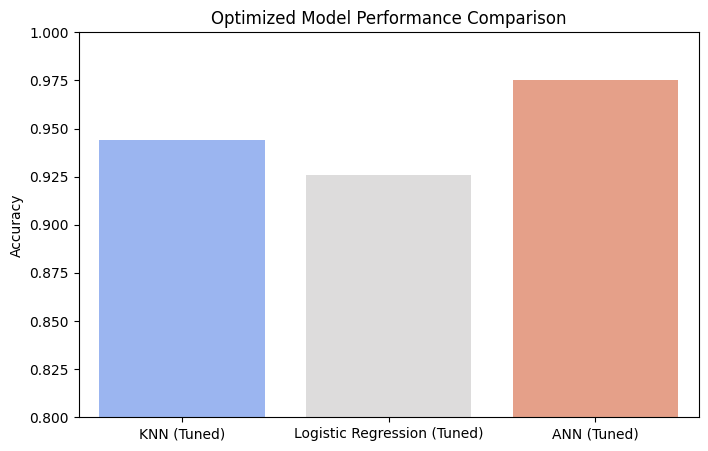

In [ ]:
# Accuracy comparison after tuning
models_tuned = ["KNN (Tuned)", "Logistic Regression (Tuned)", "ANN (Tuned)"]
accuracies_tuned = [
    accuracy_score(y_test, y_pred_knn_best),
    accuracy_score(y_test, y_pred_log_best),
    accuracy_score(y_test, y_pred_ann_best)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models_tuned, y=accuracies_tuned, palette="coolwarm")
plt.ylim(0.8, 1.0)  # Accuracy range
plt.ylabel("Accuracy")
plt.title("Optimized Model Performance Comparison")
plt.show()

**Now, Train and test the models by splitting the train_mnsit.csv in to training and testing.**

In [ ]:
# Load the MNIST dataset and split into training and testing sets
df = pd.read_csv('/content/mnist_train.csv')


In [ ]:
# Separate features and labels
X = df.iloc[:, 1:].values  # Features (pixel values)
y = df.iloc[:, 0].values   # Labels (digits)

In [ ]:
# Split the dataset (80% training, 20% testing) correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes for verification
print("Shape of training dataset:", X_train.shape)
print("Shape of testing dataset:", X_test.shape)


Shape of training dataset: (48000, 784)
Shape of testing dataset: (12000, 784)


In [ ]:

# Train and evaluate KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)


In [ ]:
# Train and evaluate ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=0)  # Train ANN silently
y_pred_ann = model.predict(X_test).argmax(axis=1)
acc_ann = accuracy_score(y_test, y_pred_ann)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step


In [ ]:
# Train and evaluate Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)


In [ ]:
# Print accuracy comparison
print(f"KNN Accuracy: {acc_knn:.2f}")
print(f"Logistic Regression Accuracy: {acc_lr:.2f}")
print(f"ANN Accuracy: {acc_ann:.2f}")

KNN Accuracy: 0.94
Logistic Regression Accuracy: 0.92
ANN Accuracy: 0.97


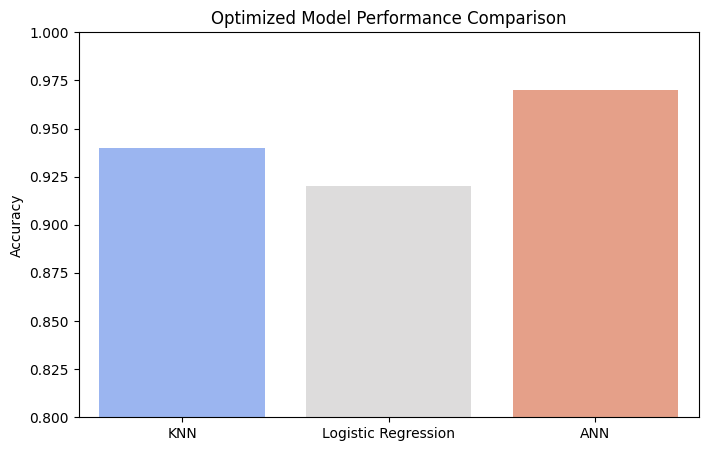

In [ ]:

acc_ann = 0.97
acc_knn = 0.94
acc_lr = 0.92

models_tuned = ["KNN", "Logistic Regression", "ANN"]
accuracies_tuned = [acc_knn, acc_lr, acc_ann]  # List of numerical values

plt.figure(figsize=(8, 5))
sns.barplot(x=models_tuned, y=accuracies_tuned, palette="coolwarm")
plt.ylim(0.8, 1.0)  # Accuracy range
plt.ylabel("Accuracy")
plt.title("Optimized Model Performance Comparison")
plt.show()
